In [3]:
import random
import numpy as np
from deap import base, creator, tools, algorithms


In [9]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [14]:
problem.data

{}

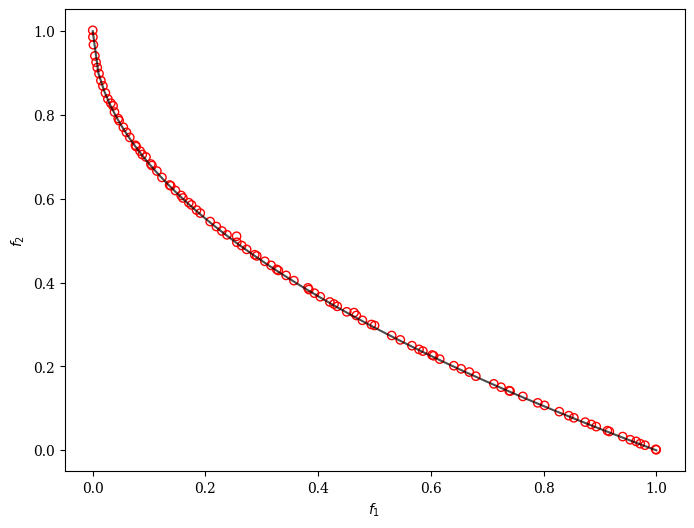

In [10]:
problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [15]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# Definir el problema de optimización como multi-objetivo (maximización y minimización)
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # Maximizar la suma, minimizar el producto punto
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Crear una función para generar un individuo
def crear_individuo():
    return creator.Individual([random.uniform(0, 1) for _ in range(9)])

# Función de evaluación: (sumar valores, producto punto)
def evaluar_individuo(individuo, vector_producto):
    suma = sum(individuo)
    producto_punto = np.dot(individuo, vector_producto)  # Producto punto con un vector dado
    return suma, producto_punto

# Configurar el vector con el cual se realizará el producto punto
vector_producto = [random.uniform(0, 1) for _ in range(9)]

# Configuración del entorno evolutivo
toolbox = base.Toolbox()
toolbox.register("individual", crear_individuo)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluar_individuo, vector_producto=vector_producto)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.0, up=1.0, eta=0.1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("map", map)

# Parámetros del algoritmo
NGEN = 50  # Número de generaciones
POPSIZE = 100  # Tamaño de la población
CXPB = 0.7  # Probabilidad de cruce
MUTPB = 0.2  # Probabilidad de mutación

# Inicializar la población
population = toolbox.population(n=POPSIZE)

# Algoritmo evolutivo
algorithms.eaMuPlusLambda(population, toolbox, mu=POPSIZE, lambda_=POPSIZE, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                          stats=None, halloffame=None, verbose=True)

# Obtener los resultados finales
pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Mostrar el frente de Pareto
for individuo in pareto_front:
    print(f"Individuo: {individuo}, Suma: {sum(individuo)}, Producto Punto: {np.dot(individuo, vector_producto)}")


gen	nevals
0  	100   
1  	95    


c:\Users\frado\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\frado\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: '>' not supported between instances of 'float' and 'complex'